In [1]:
import os
import sys
import pymongo
import numpy as np
import pandas as pd
import calendar, datetime
import matplotlib.pyplot as plt
from pymongo import MongoClient
from graph_dynamics.utils import finance

import statsmodels.api as sm
from arch.univariate import ARX
from arch import arch_model


# Convert a unix time u to a datetime object d, and vice versa
def dt(u): return datetime.datetime.utcfromtimestamp(u)
def ut(d): return calendar.timegm(d.timetuple())

#CONNECT TO MONGO 
client = MongoClient("129.26.78.40:27017")
db = client['BitCoin']

day_zero = datetime.datetime(2016,12,31)
date0 = datetime.datetime(2017,1,3)
datef = datetime.datetime(2017,8,1)

%matplotlib inline 

Using TensorFlow backend.
/home/cesar/tensorflow/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
exchange_csv = "krakenUSD.csv"
exchange_csv = "coinbaseUSD.csv"
#exchange_csv = "bitfinexUSD.csv"
exchange_csv = "1coinUSD.csv"
exchanges_dir = "/home/cesar/Desktop/Doctorado/Projects/BitCoin/Data/Price/"

A = os.listdir(exchanges_dir)

# PRICE 

In [87]:
exchanges_dir+exchange_csv

'/home/cesar/Desktop/Doctorado/Projects/BitCoin/Data/Price/1coinUSD.csv'

In [ ]:

price_data_frame = pd.read_csv(exchanges_dir+exchange_csv,names=["date","price","etc"],header=None)
price_data_frame['date'] = pd.to_datetime(price_data_frame['date'],unit='s')
price_data_frame = price_data_frame.set_index("date")
print exchange_csv
print max(price_data_frame.index)
price_data_frame["price"].plot()

coinbaseUSD.csv
2017-07-17 23:03:15
krakenUSD.csv
2017-07-17 22:28:13
bitstampUSD.csv
2017-07-17 22:23:40
okcoinCNY.csv


In [93]:
price_data_frame['date'] = pd.to_datetime(price_data_frame['date'],unit='s')
price_data_frame = price_data_frame.set_index("date")

In [3]:
cryptocurrencies_dir = "/home/cesar/Desktop/Doctorado/Projects/BitCoin/Data/CryptoCurrenciesData/"
ticker = "BTC"
CRYPTOCURRENCY = pd.read_csv(cryptocurrencies_dir+"cryptocurrencies_{0}.csv".format(ticker),parse_dates=True,index_col=0)        

In [5]:
price_data_frame = pd.DataFrame(CRYPTOCURRENCY["high"])

In [7]:
max(price_data_frame.index)

Timestamp('2017-09-18 00:00:00')

In [11]:
price_data_frame_days = price_data_frame.resample("D").max()

In [60]:
edges_dir = "/home/cesar/Desktop/Doctorado/Projects/BitCoin/Data/Transactions/"

minutes_data_frame = pd.read_csv("/home/cesar/Desktop/Doctorado/Projects/BitCoin/Data/Transactions/minutes_edges_2017.csv",names=["date","edges"],header=None,index_col=0,parse_dates=True)
hourly_data_frame = pd.read_csv("/home/cesar/Desktop/Doctorado/Projects/BitCoin/Data/Transactions/hours_edges_2017.csv",names=["date","edges"],header=None,index_col=0,parse_dates=True)
daily_data_frame = pd.read_csv("/home/cesar/Desktop/Doctorado/Projects/BitCoin/Data/Transactions/day_edges_2017.csv")
week_data_frame = pd.read_csv("/home/cesar/Desktop/Doctorado/Projects/BitCoin/Data/Transactions/weeks_edges_2017.csv")

In [61]:
logs_minutes = finance.log_difference(minutes_data_frame)

In [32]:
date0 = datetime.datetime(2013,1,10,0)
datef = datetime.datetime(2017,9,18,0)

# Volatility

In [33]:
log_returns_day = finance.log_difference(price_data_frame_days)
vol_log_returns_days = finance.volatilities(log_returns_day)

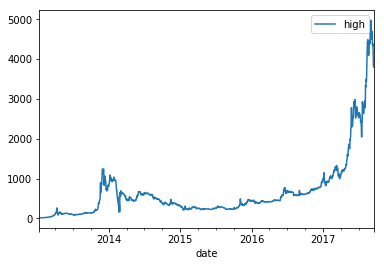

In [34]:
price_data_frame_days[date0:datef].plot()

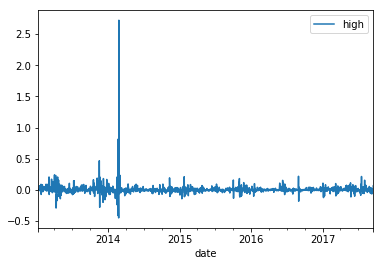

In [35]:
log_returns_day[date0:datef].plot()

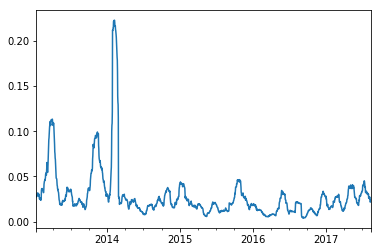

In [36]:
vol_log_returns_days[date0:datef].plot()

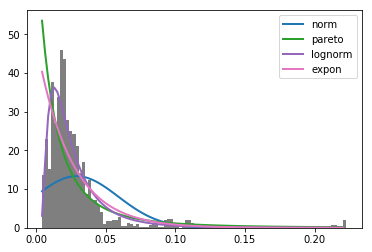

([{'distribution': 'norm',
   'ktest': 0.231159254772348,
   'parameters': (0.028957332334497408, 0.029871187897118585),
   'pvalue': 0.0},
  {'distribution': 'pareto',
   'ktest': 0.16959046981030532,
   'parameters': (2.1698424218006513,
    -0.036361379967936779,
    0.040528023499101166),
   'pvalue': 0.0},
  {'distribution': 'lognorm',
   'ktest': 0.056069425253831962,
   'parameters': (0.77063867169726086,
    0.0022504269840947951,
    0.0192074826717832),
   'pvalue': 4.8889600870127836e-05},
  {'distribution': 'expon',
   'ktest': 0.12349155405433068,
   'parameters': (0.004166643043767195, 0.02479155074962584),
   'pvalue': 0.0}],
 [])

In [38]:
finance.bestFit(vol_log_returns_days[date0:datef].values,
                plot=True,
                distToTest=["norm","pareto","lognorm","expon"],
                numberOfBins=100)

In [40]:
finance.realBestFit(vol_log_returns_days[date0:datef].values)

'lognorm'

In [21]:
#vol_log_returns_days[datetime.datetime(2016,1,1):datetime.datetime(2016,2,1)]

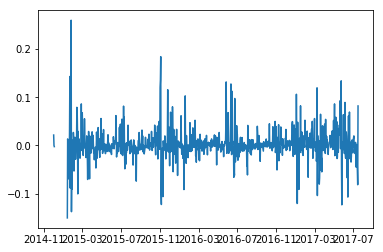

In [22]:
plt.plot(log_returns_day)

In [37]:
vol_price = finance.volatilities(log_returns_day)

In [27]:
vol_minutes  = finance.volatilities(logs_minutes)

In [28]:
date0 = datetime.datetime(2017,5,10,0)
datef = datetime.datetime(2017,5,12,0)

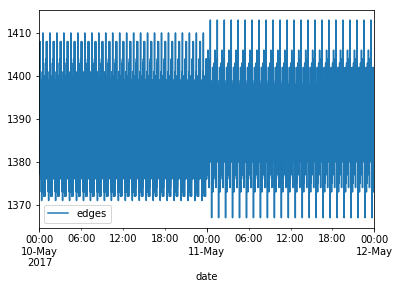

In [29]:
minutes_data_frame[date0:datef].plot()

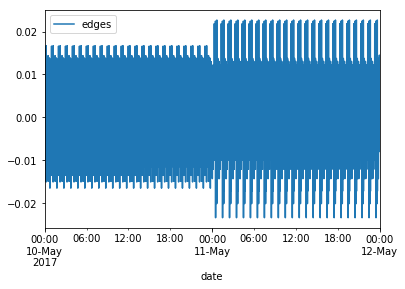

In [30]:
logs_minutes[date0:datef].plot()

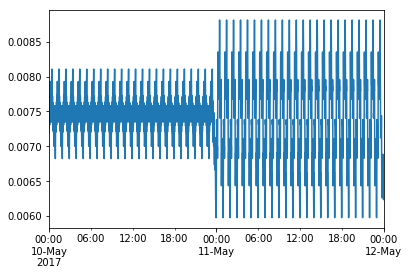

In [31]:
vol_minutes[date0:datef].plot()

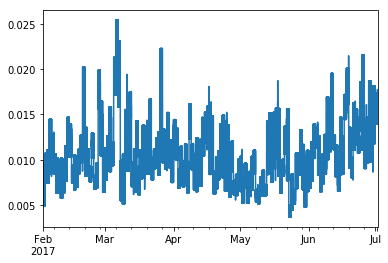

In [32]:
date0 = datetime.datetime(2017,2,1)
datef = datetime.datetime(2017,7,2)
vol_minutes[date0:datef].plot()

# HISTOGRAM OF VALUES

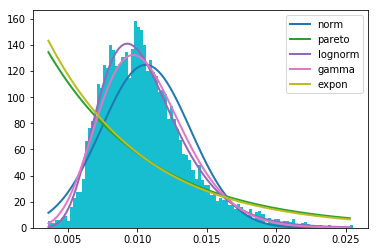

([{'distribution': 'norm',
   'ktest': 0.066796292342927499,
   'parameters': (0.010613223878807745, 0.0031970659128625041),
   'pvalue': 0.0},
  {'distribution': 'pareto',
   'ktest': 0.27100086457590272,
   'parameters': (2515.8596347771372, -18.707913009134849, 18.711541875955874),
   'pvalue': 0.0},
  {'distribution': 'lognorm',
   'ktest': 0.01208407114686838,
   'parameters': (0.30397248008385602,
    0.00040434777805421529,
    0.0097464400401179666),
   'pvalue': 5.2697523707628179e-28},
  {'distribution': 'gamma',
   'ktest': 0.028789380151272415,
   'parameters': (11.98509761654827,
    -0.00020548509685038691,
    0.00090268062162155707),
   'pvalue': 5.7918421572006043e-157},
  {'distribution': 'expon',
   'ktest': 0.2896325460595463,
   'parameters': (0.0036289505897298454, 0.0069829126551085637),
   'pvalue': 0.0}],
 [])

In [51]:
finance.bestFit(vol_minutes[date0:datef].values,
                plot=True,
                distToTest=["norm","pareto","lognorm","gamma","expon"],
                numberOfBins=100)

(array([  5158.,  39873.,  64378.,  55622.,  29154.,  12283.,   6314.,
          2756.,   1402.,    501.]),
 array([ 0.00362895,  0.00581417,  0.00799938,  0.0101846 ,  0.01236982,
         0.01455503,  0.01674025,  0.01892547,  0.02111068,  0.0232959 ,
         0.02548112]),
 <a list of 10 Patch objects>)

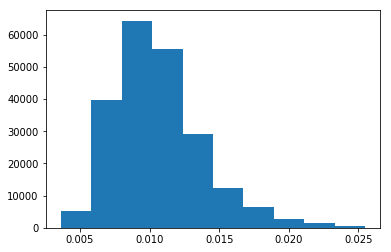

In [36]:
plt.hist(vol_minutes[date0:datef].values)

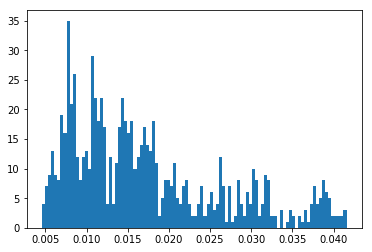

In [45]:
stuff = plt.hist(vol_price.values[100:],bins=100)

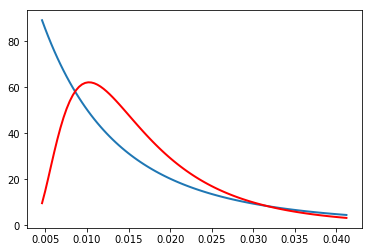

([{'distribution': 'pareto',
   'ktest': 0.12532909119588051,
   'parameters': (3.8800493442525328,
    -0.038881810711937151,
    0.043480151681526774),
   'pvalue': 8.2709394888524912e-12},
  {'distribution': 'lognorm',
   'ktest': 0.045925208873012435,
   'parameters': (0.65663062214165469,
    0.0023834990964017666,
    0.012109272429700946),
   'pvalue': 0.058711658016442403}],
 [])

In [47]:
finance.bestFitScaled(vol_price.values[100:],plot=True)

In [42]:
MEMPOOL_DATA_FRAME = pd.read_csv("/home/cesar/Desktop/Doctorado/Projects/BitCoin/Data/MemPool/mempool_dataframe.csv",index_col=0,parse_dates=True)

In [44]:
log_difference_mem_count = finance.log_difference(MEMPOOL_DATA_FRAME["COUNT"][MEMPOOL_DATA_FRAME["COUNT"].notnull()])

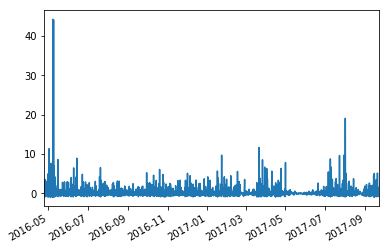

In [45]:
log_difference_mem_count.plot()

In [46]:
log_difference_mem_count.describe()

count    1501.000000
mean        0.457086
std         2.169007
min        -0.988144
25%        -0.386214
50%        -0.017813
75%         0.578056
max        44.187500
Name: COUNT, dtype: float64

In [47]:
vol_mem_count = finance.volatilities(log_difference_mem_count)

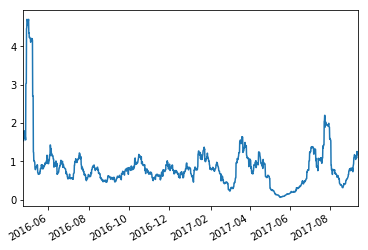

In [48]:
vol_mem_count.plot()

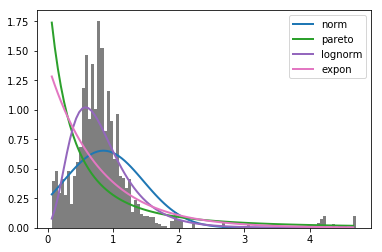

([{'distribution': 'norm',
   'ktest': 0.1835264245546594,
   'parameters': (0.84917398995891813, 0.60964527338476737),
   'pvalue': 0.0},
  {'distribution': 'pareto',
   'ktest': 0.2853742866455769,
   'parameters': (1.5281984462584488,
    -0.81720997455499744,
    0.87805453723480842),
   'pvalue': 0.0},
  {'distribution': 'lognorm',
   'ktest': 0.090500425306499405,
   'parameters': (0.43186387885529631,
    -0.24811066862064585,
    0.99185008093678384),
   'pvalue': 6.2013283397277519e-11},
  {'distribution': 'expon',
   'ktest': 0.25395482774960687,
   'parameters': (0.060844563587916664, 0.77914593048594016),
   'pvalue': 0.0}],
 [])

In [49]:
vol_statistics = finance.bestFit(vol_mem_count.values,
                              plot=True,
                              distToTest=["norm","pareto","lognorm","expon"],
                              numberOfBins=100)

vol_statistics

In [50]:
finance.realBestFit(vol_mem_count.values)

'weibull_max'